### Урок 4. Сверточные нейронные сети
- Попробуйте улучшить точность распознавания образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложите анализ с описанием того, что улучшает работу нейронной сети, а что ухудшает.\
- Опишите в анализе, какие изменения необходимо было бы внести в получившуюся нейронную сеть, если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET

In [2]:
#pip install opencv-python

In [3]:
import cv2
import numpy as np
from PIL import Image
from scipy import misc

# Загрузить изображение с помощью misc.ascent()
I = np.asarray(misc.ascent())

# Преобразование массива numpy в изображение PIL
image = Image.fromarray(I)

# Показать изображение
image.show()


C:\Users\SAMOL\AppData\Local\Temp\ipykernel_11472\50034658.py:7: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  I = np.asarray(misc.ascent())


In [4]:
I.shape

(512, 512)

In [5]:
I[101:131,120:130]

array([[ 98, 100, 101, 102, 101, 102, 101,  89,  83,  88],
       [100, 103, 102, 102, 101,  92,  81,  89,  92,  82],
       [102, 103, 101,  94,  86,  87,  98,  82,  67,  84],
       [103,  96,  85,  88,  98,  90,  63,  58,  88,  97],
       [ 90,  92,  99,  92,  67,  49,  63,  93,  97,  95],
       [ 98,  92,  68,  51,  64,  90, 100,  97,  98,  99],
       [ 71,  48,  63,  88, 102, 101,  97,  97,  98,  98],
       [ 64,  85, 102, 104,  97,  95,  97,  98,  97,  98],
       [ 99, 103, 101, 100,  97,  98,  98,  97,  98,  97],
       [ 98, 101,  99,  99,  97,  97,  97,  98,  97,  98],
       [100, 100,  99,  97,  97,  97,  98,  97,  97,  99],
       [101, 100,  99,  97,  99, 100,  99,  97,  97,  98],
       [101, 101,  98,  98,  99, 101,  98,  98,  98,  98],
       [100,  99, 102, 100,  99,  97,  97,  98, 100, 100],
       [100,  99, 101, 101,  99,  98,  98,  99, 101, 100],
       [101, 101, 100, 101, 101, 101, 101, 101, 100, 101],
       [101, 101, 100,  99, 100, 101, 100, 101, 101,  99

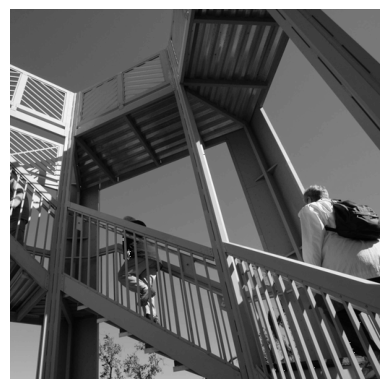

In [6]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(I)
plt.show()

In [7]:
I_transformed = np.copy(I)
size_x = I_transformed.shape[0]
size_y = I_transformed.shape[1]

In [8]:
#filter = np.array([ [1, 1, 1], [1, 1, 1], [1, 1, 1]])/9
#Фильтры края.

#Разные фильтры.
#filter = np.array([ [0, 1, 0], [1, -4, 1], [0, 1, 0]])

#Много разных
#filter = np.array([ [-1, -2, -1], [1, -4, 1], [0, 1, 0]])
filter = np.array([ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

#зададим вес для свертки
weight = 1

In [9]:
np.array(filter).shape

(3, 3)

In [10]:
np.array(filter).T

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [11]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
    convolution = 0.0
    convolution = convolution + (I[x - 1, y-1] * filter[0][0])
    convolution = convolution + (I[x, y-1] * filter[0][1])
    convolution = convolution + (I[x + 1, y-1] * filter[0][2])
    convolution = convolution + (I[x-1, y] * filter[1][0])
    convolution = convolution + (I[x, y] * filter[1][1])
    convolution = convolution + (I[x+1, y] * filter[1][2])
    convolution = convolution + (I[x-1, y+1] * filter[2][0])
    convolution = convolution + (I[x, y+1] * filter[2][1])
    convolution = convolution + (I[x+1, y+1] * filter[2][2])
    if(convolution<0):
      convolution=-convolution
    if(convolution>255):
      convolution=255
    I_transformed[x, y] = convolution

C:\Users\SAMOL\AppData\Local\Temp\ipykernel_11472\2493784486.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


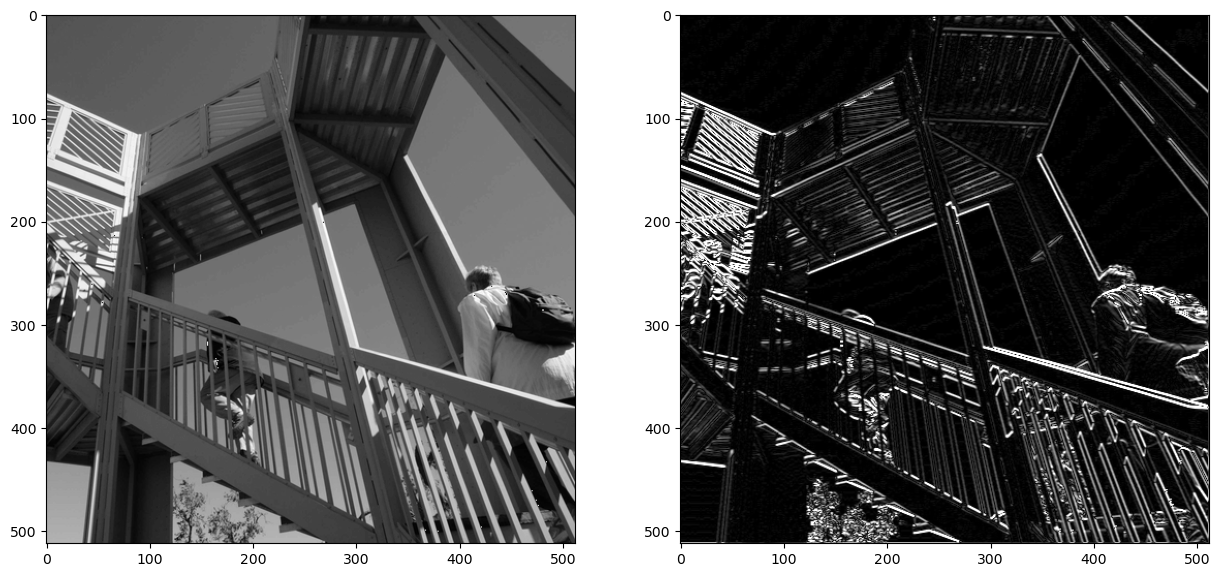

C:\Users\SAMOL\AppData\Local\Temp\ipykernel_11472\2493784486.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


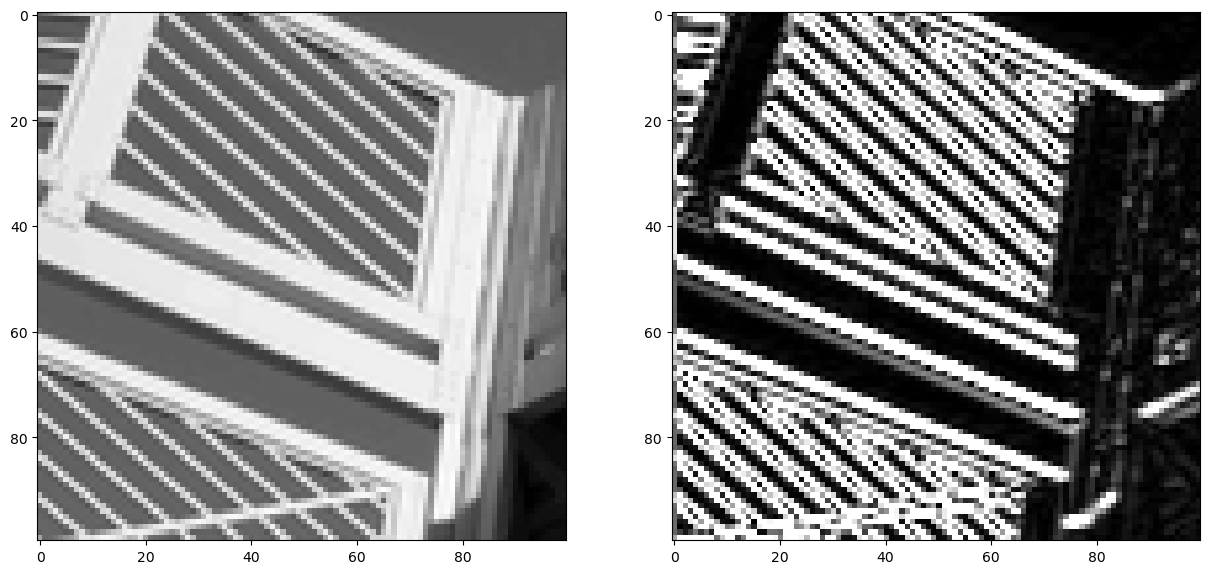

In [12]:
plt.figure(figsize=(15, 7))
plt.grid(False)
plt.gray()
#plt.axis('off')
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(I_transformed)
plt.show()

ymin,ymax,xmin,xmax = 100,200,0,100

plt.figure(figsize=(15, 7))
plt.grid(False)
plt.gray()
#plt.axis('off')
plt.subplot(1,2,1)
plt.imshow(I[ymin:ymax,xmin:xmax])
plt.subplot(1,2,2)
plt.imshow(I_transformed[ymin:ymax,xmin:xmax])
plt.show()

In [1]:
#pip install tensorflow

In [2]:
#pip install --upgrade pyarrow

In [1]:
from numpy import asarray
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D

# определение входных данных(8 массивов с 8 элементами)
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 1, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 1],
		[0, 0, 0, 1, 1, 0, 0, 0]]

data = asarray(data)
data = data.reshape(1, 8, 8, 1)

# создание модели
x_input = Input(shape=(8,8,1))
x_conv = Conv2D( 1, (3,3), strides=(1,1), activation='relu', padding='same')(x_input)
x_pool = GlobalMaxPooling2D( )(x_conv)

model = Model(x_input,x_pool)
model_conv = Model(x_input,x_conv)

# вывод описания созданной модели
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8, 8, 1)]         0         
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 1)           10        
                                                                 
 global_max_pooling2d (Glob  (None, 1)                 0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
#pip install pydot

In [9]:
from tensorflow.keras.utils import plot_model

# Отобразить графическую модель
plot_model(model, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


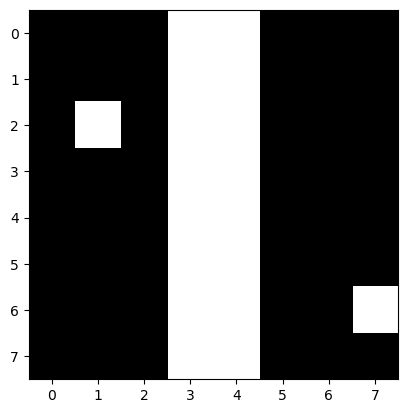

In [6]:
import matplotlib.pyplot as plt

plt.imshow(data[0, :, :, 0], cmap='gray')
plt.show()

### Практическое задание 1

- Попробуйте улучшить точность распознавания образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложите анализ с описанием того, что улучшает работу нейронной сети, а что ухудшает

#### Простейшая свёрточная нейронная сеть для работы с датасетом CIFAR-10 

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Загрузка CIFAR-10 датасета
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Преобразование меток в формат one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Создание модели
model = Sequential()

# Добавление сверточных слоев
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Преобразование 3D-признакового пространства в вектор
model.add(Flatten())

# Полносвязные слои
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Обучение модели
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

# Оценка модели на тестовых данных
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


170498071/170498071 [==============================] - 602s 4us/step
Epoch 1/10
782/782 [==============================] - 98s 124ms/step - loss: 1.9502 - accuracy: 0.3536 - val_loss: 1.4257 - val_accuracy: 0.4775
Epoch 2/10
782/782 [==============================] - 101s 129ms/step - loss: 1.3724 - accuracy: 0.5064 - val_loss: 1.1416 - val_accuracy: 0.6088
Epoch 3/10
782/782 [==============================] - 103s 132ms/step - loss: 1.1801 - accuracy: 0.5836 - val_loss: 1.0115 - val_accuracy: 0.6474
Epoch 4/10
782/782 [==============================] - 110s 141ms/step - loss: 1.0870 - accuracy: 0.6197 - val_loss: 0.9422 - val_accuracy: 0.6761
Epoch 5/10
782/782 [==============================] - 112s 143ms/step - loss: 1.0072 - accuracy: 0.6473 - val_loss: 0.9561 - val_accuracy: 0.6702
Epoch 6/10
782/782 [==============================] - 108s 139ms/step - loss: 0.9599 - accuracy: 0.6645 - val_loss: 0.8569 - val_accuracy: 0.7056
Epoch 7/10
782/782 [==============================] - 11

### Практическое задание 2
- Описать также в анализе какие необоходимо внести изменения в получившуюся у вас нейронную сеть если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET.

Во первых посмотрим на предложенные датасеты:
- MNIST: Датасет MNIST состоит из черно-белых изображений размером 28x28 пикселей, содержащих рукописные цифры от 0 до 9. Вам необходимо будет изменить размер входного слоя модели на (28, 28, 1) и количество выходных классов на 10. Также можно упростить архитектуру модели, так как MNIST - относительно простой датасет. Например, можно удалить некоторые сверточные слои или уменьшить количество фильтров в сверточных слоях.

- CIFAR-100: Датасет CIFAR-100 содержит цветные изображения размером 32x32 пикселя, разделенные на 100 классов. В этом случае можно оставить архитектуру модели неизменной, так как размеры изображений остаются как у CIFAR-10. Однако нужно будет изменить количество выходных классов на 100, чтобы соответствовать количеству классов в CIFAR-100.

- ImageNet: Датасет ImageNet является крупнейшим набором данных изображений и содержит миллионы изображений, разделенных на тысячи классов. Учитывая большой размер датасета и сложность задачи классификации, вам потребуется более глубокая и сложная архитектура модели. Вы можете использовать предварительно обученные модели, такие как VGG, ResNet или Inception, и настроить их для вашей задачи. Возможно, вам потребуется изменить размер входных изображений в соответствии с требованиями выбранной предварительно обученной модели.

В целом, адаптация нейронной сети для работы с этими датасетами потребует:
- изменений в архитектуре модели,
- размере входных данных и количестве классов.

можно также проводить дополнительные эксперименты, добавлять или удалять слои, настраивать гиперпараметры и применять различные техники обучения, чтобы достичь лучшей производительности.

Ниже представлен изменённый код для указанных датасетов.

In [ ]:
# Код для работы с датасетом MNIST

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
import os

# Установка параметров нейросети
batch_size = 128
num_classes = 10
epochs = 12

# Загрузка данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Преобразование размерности данных
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Преобразование типа данных и нормализация
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Преобразование меток классов в бинарный формат
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Создание модели
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Компиляция модели
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Обучение модели
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Оценка производительности модели на тестовых данных
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Изменена архитектура модели, адаптировны размерности входных данных и изменено количество выходных классов для датасета CIFAR-100

In [4]:
# Код для работы с датасетом CIFAR-100

from __future__ import print_function
import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
import os

# Установка параметров нейросети
batch_size = 128
num_classes = 100
epochs = 50

# Загрузка данных CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Преобразование типа данных и нормализация
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Преобразование меток классов в бинарный формат
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Создание модели
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Компиляция модели
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Обучение модели
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Оценка производительности модели на тестовых данных
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


169001437/169001437 [==============================] - 776s 5us/step
Epoch 1/50
391/391 [==============================] - 81s 205ms/step - loss: 3.8384 - accuracy: 0.1222 - val_loss: 3.2209 - val_accuracy: 0.2430
Epoch 2/50
391/391 [==============================] - 86s 219ms/step - loss: 3.1315 - accuracy: 0.2405 - val_loss: 2.8344 - val_accuracy: 0.3100
Epoch 3/50
391/391 [==============================] - 81s 208ms/step - loss: 2.7681 - accuracy: 0.3083 - val_loss: 2.5774 - val_accuracy: 0.3569
Epoch 4/50
391/391 [==============================] - 86s 219ms/step - loss: 2.5051 - accuracy: 0.3621 - val_loss: 2.4695 - val_accuracy: 0.3762
Epoch 5/50
391/391 [==============================] - 85s 217ms/step - loss: 2.2857 - accuracy: 0.4044 - val_loss: 2.4094 - val_accuracy: 0.3930
Epoch 6/50
391/391 [==============================] - 79s 202ms/step - loss: 2.1020 - accuracy: 0.4410 - val_loss: 2.3315 - val_accuracy: 0.4027
Epoch 7/50
391/391 [==============================] - 82s 209

### ImageNet

Датасет ImageNet очень большой и требует глубокой нейронной сети с большим количеством параметров для эффективного обучения.

Вот адаптированный код для работы с датасетом ImageNet, используя предварительно обученную модель ResNet50:

В этом коде
- используется предварительно обученную модель ResNet50.
- загрузкаи данных ImageNet.
- создание генератора данных для обучения и тестирования.

 работа с датасетом ImageNet может потребоваться значительное количество вычислительных ресурсов и времени для обучения модели.

In [20]:
#pip install tensorflow-datasets

Будем использовать из датасета ImageNet небольшую подвыборку изображений размером 64x64 пикселей.\
Для полного датасета ImageNet требуются специальные инструменты и дополнительные настройки для обработки и использования.

In [1]:
# Код для загрузки и предобработки минивыборки датасета ImageNet

import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Загрузка датасета ImageNet с помощью tensorflow_datasets
dataset, info = tfds.load('imagenet_resized/64x64', with_info=True, shuffle_files=True, as_supervised=True)

# Получение количества классов в датасете
num_classes = info.features['label'].num_classes

# Функция для предобработки изображений
def preprocess_image(image, label):
    # Масштабирование значений пикселей в диапазон от -1 до 1
    image = preprocess_input(image)
    return image, label

# Применение предобработки к датасету
preprocessed_dataset = dataset['train'].map(preprocess_image)

# Перевод меток классов в one-hot encoding
def preprocess_label(image, label):
    label = tf.one_hot(label, num_classes)
    return image, label

# Изменение размерности изображений в датасете
preprocessed_dataset_resized = preprocessed_dataset.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))
preprocessed_dataset_resized = preprocessed_dataset_resized.map(preprocess_label)


# Разделение датасета на обучающую и тестовую выборки
train_dataset = preprocessed_dataset_resized.take(1000)  # Первые 1000 изображений для обучения
test_dataset = preprocessed_dataset_resized.skip(1000)  # Остальные изображения для тестирования

# Перемешивание и батчирование данных
train_dataset = train_dataset.shuffle(1000).batch(32)
test_dataset = test_dataset.batch(32)

# Проверка загруженных данных
for image, label in train_dataset.take(1):
    # Размерность батча изображений
    print(image.shape)
    # Метки классов
    print(label)

(32, 224, 224, 3)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 1000), dtype=float32)


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Создание предварительно обученной модели ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Создание модели для Featurization
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


# Обучение модели
model.fit(train_dataset,
          epochs=10,
          validation_data=test_dataset)

# Оценка производительности модели на тестовых данных
score = model.evaluate(test_dataset)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 7.1823 - accuracy: 0.0020

### Изменение кода рассмотренного на лекции (исправление)
#### Пример на Keras более сложной сверточной нейронной сети

In [16]:
from __future__ import print_function
import keras # расскоментируйте эту строку, чтобы начать обучение
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

# установка параметров нейросети
batch_size = 3
num_classes = 10
epochs = 3
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1), padding="same"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax"),
])

model.summary()

# compile the model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# start training
epochs = 20

model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))
# конфигурирование слоев нейросети
# model = Sequential()
# # hist = model.fit(train_images, train_labels, batch_size = 250, epochs=25)
# # слои нейросети отвественные за свертку и max-pooling
# model.add(Conv2D(32, (3, 3),
#                  padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(128, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(128, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(128, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # полносвязные слои нейронной сети
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

# инициализация RMSprop optimizer
#opt = keras.optimizers.RMSprop(lr=0.0001, decay=0.17e-6) - УСТАРЕЛО

opt = keras.optimizers.RMSprop(learning_rate=0.0001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False)

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# компиляция модели
model.compile(loss='categorical_crossentropy',
               optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.,
        zoom_range=0.,
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (60000, 28, 28)
60000 тренировочные примеры
10000 тестовые примеры
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 7, 7, 128)         73856     
                                      

ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (60000, 28, 28))

Сообщение об ошибке связано с формой ввода (60000, 28, 28) при использовании ImageDataGenerator в Keras.

- ImageDataGenerator ожидает, что входные данные будут иметь форму ранг 4, включая измерение цветового канала.
- Чтобы решить эту проблему, нужно изменить форму входных данных, чтобы они имели форму ранга 4, добавив измерение цветового канала.
- Поскольку  изображения имеют оттенки серого, размер цветового канала будет иметь размер 1.


Внесём необходимые изменения для работы с MNIST

In [13]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

# Задайте параметры нейронной сети
batch_size = 3
num_classes = 10
epochs = 3
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_mnist_trained_model.h5'

# Загрузите набор данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'training examples')
print(x_test.shape[0], 'testing examples')

# Измените форму входных данных, чтобы они имели форму ранга 4
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# Преобразуйте метки классов в бинарные матрицы классов
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Определить архитектуру модели
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

# Скомпилируйте модель
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

# Начать обучение
if not data_augmentation:
    print('Not using data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation')

    # Создайте экземпляр ImageDataGenerator с желаемыми конфигурациями дополнений.
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip=False)

    # Соответствуйте генератору обучающим данным
    datagen.fit(x_train)

    # Обучите модель с помощью расширенного генератора данных
    model.fit(datagen.flow(x_train, y_train,
                           batch_size=batch_size),
              epochs=epochs,
              validation_data=(x_test, y_test))

# Сохраните обученную модель
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at', model_path)

# Оцените модель на тестовых данных
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


x_train shape: (60000, 28, 28)
60000 training examples
10000 testing examples
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 128)         73856     
                                          

C:\Users\SAMOL\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2s 6ms/step - loss: 2.3017 - accuracy: 0.1135
Test loss: 2.3017208576202393
Test accuracy: 0.11349999904632568
